<a href="https://colab.research.google.com/github/pranavred/llm_experiments/blob/main/narrator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "openai<1.0.0"
!pip install cohere tiktoken

In [ ]:
from IPython.display import display, Image, Audio
import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Give your video path below from google drive
video_path = '/content/drive/My Drive/GPT4videos/Dhoni finishes off in style.mp4'

video = cv2.VideoCapture(video_path)

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

503 frames read.


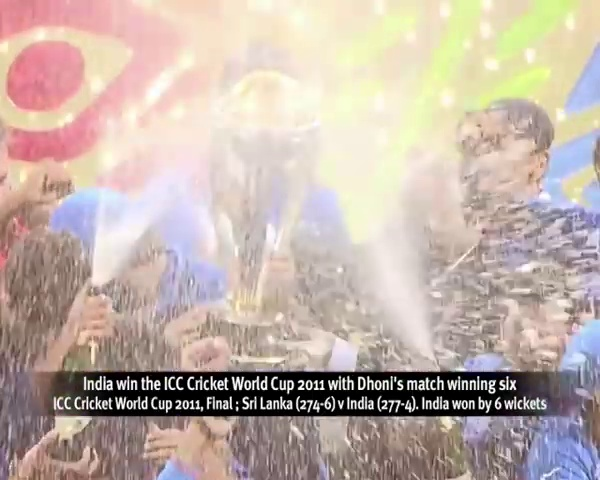

In [ ]:
display_handle = display(None, display_id=True)
for img in base64Frames:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.1.1
    Uninstalling openai-1.1.1:
      Successfully uninstalled openai-1.1.1


In [ ]:
PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            "These are frames of a video where India wins the cricket 2011 worldcup. Create a short voiceover script in the style of a super excited cricket sports narrator who is narrating his favorite ending to a match, with Dhoni hitting a six. He is a big fan of Dhoni, the player who hits a sixer in this clip. Use caps and exclamation marks where needed to communicate excitement. Only include the narration, your output must be in english. When the ball goes out of the boundary, you must scream SIXER either once or multiple times.",
            *map(lambda x: {"image": x, "resize": 768}, base64Frames[0::80]),
        ],
    },
]

params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "api_key": 'YOUR_API_KEY',
    "headers": {"Openai-Version": "2020-11-07"},
    "max_tokens": 500,
}

result = openai.ChatCompletion.create(**params)
print(result.choices[0].message.content)

LADIES AND GENTLEMEN, HOLD ON TO YOUR SEATS! We're down to the wire here in Mumbai, and the drama is absolutely ELECTRIFYING! India needs just FOUR RUNS to take home the GLORY! And here's the man of the hour - the captain cool himself, MS Dhoni, looking as determined as ever to finish things off in STYLE! The bowler's sweating bullets as he starts his run-up...

AND HERE'S THE DELIVERY!!! Dhoni steps up... OH MY, THAT'S A SHOT! THAT'S A MAGNIFICENT STRIKE! THE BALL'S SOARING HIGH AND MIGHTY... It’s traveling... traveling... AND OH LORD...

SIXER!!! SIXER!!! SIXER!!! MS DHONI DOES IT! ABSOLUTELY SENSATIONAL! The crowd goes WILD!!! The Indian team is erupting in JOY! He's the HERO India needed, the MAESTRO with a legendary finish! Dhoni, you BEAUTY! What a fairy-tale ending to this nail-biting saga of the ICC Cricket World Cup 2011!

AND THERE IT IS, folks! India lifts the WORLD CUP after 28 years! THE INDIAN PLAYERS ARE OVERCOME WITH EMOTION! Tears, cheers, and a nation's dreams realize

In [ ]:
response = requests.post(
    "https://api.openai.com/v1/audio/speech",
    headers={
        "Authorization": f"Bearer YOUR_API_KEY",
    },
    json={
        "model": "tts-1",
        "input": result.choices[0].message.content,
        "voice": "fable",
    },
)

audio = b""
for chunk in response.iter_content(chunk_size=1024 * 1024):
    audio += chunk
Audio(audio)

In [ ]:
# ... your existing code ...

# Now, write the `audio` bytes to an MP3 file
file_path = '/content/drive/My Drive/GPT4videos/output.mp3'

# Now, write the `audio` bytes to the MP3 file at the specified path
with open(file_path, 'wb') as file:
    file.write(audio)

print(f"The MP3 file has been saved locally in your Google Drive as '{file_path}'.")



The MP3 file has been saved locally in your Google Drive as '/content/drive/My Drive/GPT4videos/output.mp3'.
